In [1]:
import pandas as pd
%matplotlib inline

# Main task

## 1. Reading data from csv into DataFrame

In [2]:
df: pd.DataFrame = pd.read_csv('../data/Data2.csv', sep=';', encoding="ISO-8859-1")
df.head()

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
0,Afghanistan,South Asia,"561,7787463",34656032.0,"9809,225",652860
1,Albania,Europe & Central Asia,"4124,98239",2876101.0,"5716,853",28750
2,Algeria,Middle East & North Africa,"3916,881571",40606052.0,"145400,217",2381740
3,American Samoa,East Asia & Pacific,"11834,74523",55599.0,NaN,200
4,Andorra,Europe & Central Asia,"36988,62203",77281.0,"462,042",470


In [3]:
df.tail()

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
212,Virgin Islands (U.S.),Latin America & Caribbean,NaN,102951.0,NaN,350
213,West Bank and Gaza,Middle East & North Africa,"2943,404534",4551566.0,NaN,6020
214,"Yemen, Rep.",Middle East & North Africa,"990,334774",27584213.0,"22698,73",527970
215,Zambia,Sub-Saharan Africa,"1269,573537",16591390.0,"4503,076",752610
216,Zimbabwe,Sub-Saharan Africa,"1029,076649",16150362.0,"12020,426",390760


## 2. Data cleaning

### 2.1 Renaming columns

In [4]:
df = df.rename(columns={'Populatiion': 'Population'})
df.head()

,Country Name,Region,GDP per capita,Population,CO2 emission,Area
0,Afghanistan,South Asia,"561,7787463",34656032.0,"9809,225",652860
1,Albania,Europe & Central Asia,"4124,98239",2876101.0,"5716,853",28750
2,Algeria,Middle East & North Africa,"3916,881571",40606052.0,"145400,217",2381740
3,American Samoa,East Asia & Pacific,"11834,74523",55599.0,NaN,200
4,Andorra,Europe & Central Asia,"36988,62203",77281.0,"462,042",470


### 2.2 Checking for duplicates

In [5]:
df.duplicated().sum()

0

### 2.3 Formatting columns

In [6]:
for column in ['GDP per capita', 'CO2 emission', 'Area']:
    df[column] = df[column].str.replace(',', '.')
    df[column] = df[column].str.replace('-', '')
    df[column] = df[column].astype(float)
df.head()

,Country Name,Region,GDP per capita,Population,CO2 emission,Area
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225,652860.0
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853,28750.0
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217,2381740.0
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,NaN,200.0
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042,470.0


In [7]:
df[df['Country Name'].str.contains('Congo')]

,Country Name,Region,GDP per capita,Population,CO2 emission,Area
44,"Congo, Dem. Rep.",Sub-Saharan Africa,405.542501,78736153.0,4671.758,2344860.0
45,"Congo, Rep.",Sub-Saharan Africa,1528.244720,5125821.0,3094.948,342000.0


In [8]:
country_mapping = {'Congo, Dem. Rep.': 'Democratic Republic of the Congo', 'Congo, Rep.': 'Republic of the Congo'}
df['Country Name'] = df['Country Name'].replace(country_mapping)
df[df['Country Name'].str.contains('Congo')]

,Country Name,Region,GDP per capita,Population,CO2 emission,Area
44,Democratic Republic of the Congo,Sub-Saharan Africa,405.542501,78736153.0,4671.758,2344860.0
45,Republic of the Congo,Sub-Saharan Africa,1528.244720,5125821.0,3094.948,342000.0


In [9]:
df['Country Name'] = df['Country Name'].str.extract(r'([a-zA-Z\s\.]+)')
df.head()

,Country Name,Region,GDP per capita,Population,CO2 emission,Area
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225,652860.0
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853,28750.0
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217,2381740.0
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,NaN,200.0
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042,470.0


### 2.4 Mean imputation (additional task)

In [10]:
df.isna().sum()

Country Name       0
Region             0
GDP per capita    27
Population         1
CO2 emission      12
Area               0
dtype: int64

In [11]:
df.fillna(df.mean(numeric_only=True), inplace=True)
df.head()

,Country Name,Region,GDP per capita,Population,CO2 emission,Area
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860.0
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750.0
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740.0
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200.0
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470.0


In [12]:
df['Population'] = df['Population'].astype('int')
df.head()

,Country Name,Region,GDP per capita,Population,CO2 emission,Area
0,Afghanistan,South Asia,561.778746,34656032,9809.225000,652860.0
1,Albania,Europe & Central Asia,4124.982390,2876101,5716.853000,28750.0
2,Algeria,Middle East & North Africa,3916.881571,40606052,145400.217000,2381740.0
3,American Samoa,East Asia & Pacific,11834.745230,55599,165114.116337,200.0
4,Andorra,Europe & Central Asia,36988.622030,77281,462.042000,470.0


## 3. Box plots and histograms

### 3.1 Box plot for GDP per capita

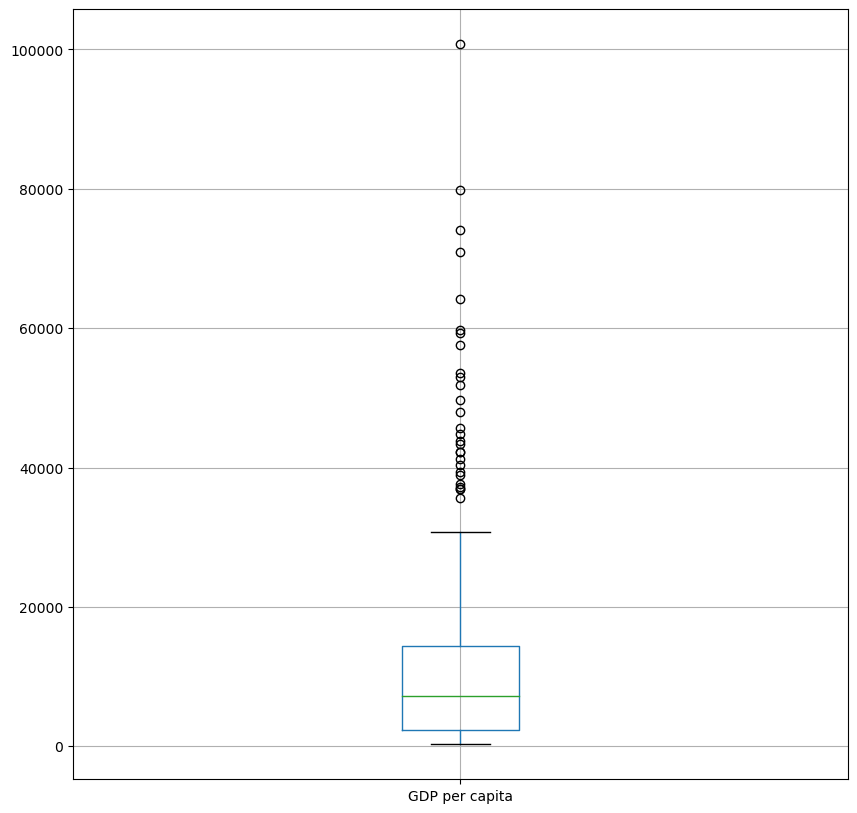

In [13]:
df.boxplot(column='GDP per capita', figsize=(10, 10));

### 3.2 Histogram for GDP per capita

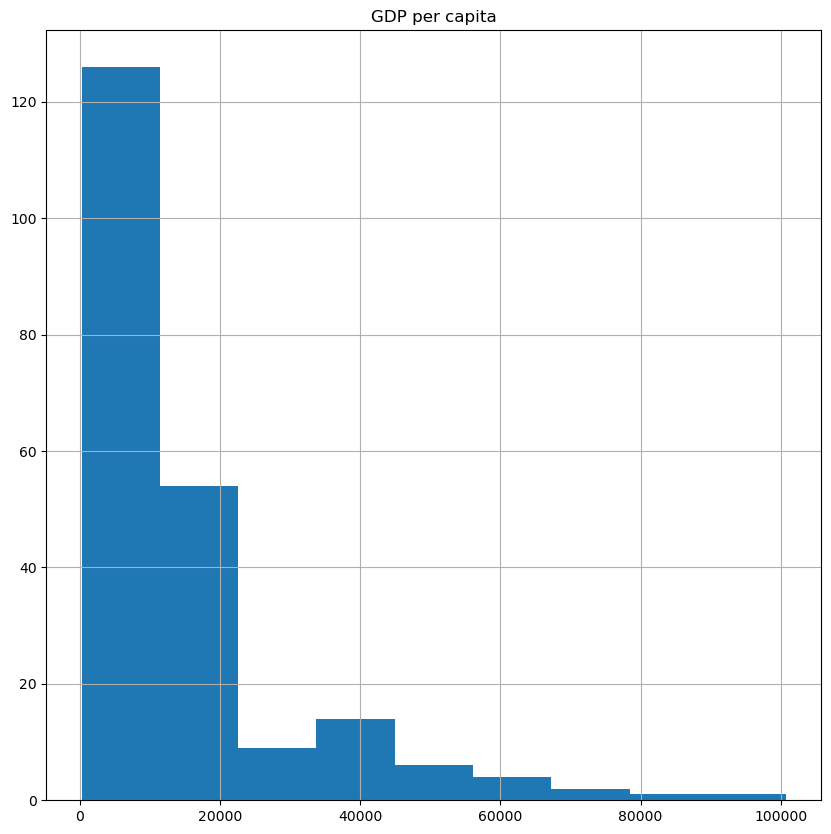

In [14]:
df.hist(column='GDP per capita', figsize=(10, 10), bins=9);

In [15]:
df.to_csv('../data/data_2_cleaned.csv', index=False)

## 4. Addition of the column "Population Density"

In [16]:
df['Population Density'] = df['Population'] / df['Area']
df.head()

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population Density
0,Afghanistan,South Asia,561.778746,34656032,9809.225000,652860.0,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101,5716.853000,28750.0,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052,145400.217000,2381740.0,17.048902
3,American Samoa,East Asia & Pacific,11834.745230,55599,165114.116337,200.0,277.995000
4,Andorra,Europe & Central Asia,36988.622030,77281,462.042000,470.0,164.427660


# Additional task

## 1. The country with the highest GDP per capita and the country with the smallest area

In [17]:
df[['Country Name', 'GDP per capita']][df['GDP per capita'] == df['GDP per capita'].max()].set_index('Country Name')

,GDP per capita
Country Name,
Luxembourg,100738.6842


In [18]:
df[['Country Name', 'Area']][df['Area'] == df['Area'].min()].set_index('Country Name')

,Area
Country Name,
Monaco,2.0


## 2. The region with the biggest average area of the country

In [19]:
areas_df = df.groupby(by='Region')['Area'].mean()
areas_df[areas_df == areas_df.max()]

Region
North America    6605410.0
Name: Area, dtype: float64

## 3. The country with the highest population density in the world and in Europe and Central Asia

In [20]:
df[['Country Name', 'Population Density']][df['Population Density'] == df['Population Density'].max()].set_index(
    'Country Name')

,Population Density
Country Name,
Macao SAR,20203.531353


In [21]:
europe_asia_df = df[df['Region'] == 'Europe & Central Asia']
europe_asia_df[europe_asia_df['Population Density'] == europe_asia_df['Population Density'].max()][
    ['Country Name', 'Population Density']].set_index('Country Name')

,Population Density
Country Name,
Monaco,19249.5


## 4. Check if there is a region with the same GDP mean and GDP median

In [22]:
mean_median_df = df.groupby('Region').agg({'GDP per capita': ['mean', 'median']})
mean_median_df.columns = ['GDP mean', 'GDP median']
mean_median_df[mean_median_df['GDP mean'] == mean_median_df['GDP median']]

,GDP mean,GDP median
Region,,


In [23]:
mean_median_df['Difference'] = abs(mean_median_df['GDP median'] - mean_median_df['GDP mean'])
mean_median_df[mean_median_df['Difference'] == mean_median_df['Difference'].min()]

,GDP mean,GDP median,Difference
Region,,,
Latin America & Caribbean,10485.343136,10833.201075,347.857939


## 5. Top-5 countries by GDP and CO2 emission per capita and bottom 5 counties respectively

In [24]:
top_gdp_df = df[['Country Name']].assign(
    **{'GDP': df['GDP per capita'] * df['Population']})
top_gdp_df = top_gdp_df.sort_values(by='GDP', ascending=False).set_index('Country Name')['GDP']
top_gdp_df.head()

Country Name
United States     1.862448e+13
China             1.119915e+13
Japan             4.940159e+12
Germany           3.485379e+12
United Kingdom    2.649581e+12
Name: GDP, dtype: float64

In [25]:
top_gdp_df.tail()

Country Name
Palau               3.102483e+08
Marshall Islands    1.944979e+08
Kiribati            1.815515e+08
Nauru               1.020601e+08
Tuvalu              3.421888e+07
Name: GDP, dtype: float64

In [26]:
top_co2_df = df[['Country Name']].assign(
    **{'CO2 per capita': df['CO2 emission'] / df['Population']}
)
top_co2_df = top_co2_df.sort_values(by='CO2 per capita', ascending=False).set_index('Country Name')
top_co2_df.head()

,CO2 per capita
Country Name,
St. Martin,5.168053
San Marino,4.972867
Monaco,4.288790
Northern Mariana Islands,3.000820
American Samoa,2.969732


In [27]:
top_co2_df.tail()

,CO2 per capita
Country Name,
Democratic Republic of the Congo,0.000059
Chad,0.000050
Somalia,0.000043
Burundi,0.000042
Eritrea,0.000020
